# Técnicas de Optimización en el Contexto Empresarial

## Objetivo de la Sesión

En esta sesión, aprenderemos sobre **técnicas de optimización** y cómo aplicarlas para mejorar la toma de decisiones en un contexto empresarial. Nos enfocaremos en cómo maximizar el retorno sobre la inversión en marketing al optimizar la asignación de capital en diferentes canales de adquisición de clientes. Este tipo de optimización es esencial cuando el **Costo de Adquisición de Clientes (CAC)** no sigue una relación lineal y varía según el canal y el volumen de clientes deseado.

---

### Introducción a la Optimización

**La optimización** es el proceso de encontrar el mejor resultado posible bajo un conjunto de restricciones. En el contexto empresarial, esto implica maximizar o minimizar un indicador clave de rendimiento (KPI) o un valor objetivo, como ingresos, CAC o retorno sobre inversión (ROI). La optimización es una herramienta poderosa en el análisis prescriptivo, ya que permite a las empresas decidir cómo asignar sus recursos de manera eficiente.

---

### Importancia de la Optimización en la Asignación de Presupuesto de Marketing

En empresas donde los **canales de adquisición** varían en costo y efectividad, es fundamental determinar la asignación óptima del presupuesto de marketing. Los costos de adquisición tienden a **incrementarse a medida que aumenta el número de usuarios** que se desea adquirir, ya que la competencia se intensifica y se agotan los segmentos de menor costo.

**Objetivos Clave:**
1. **Minimizar el CAC**: Lograr el menor costo posible por cada usuario adquirido.
2. **Maximizar el ARPU (Average Revenue per User)**: Aumentar los ingresos promedio por usuario.
3. **Optimizar la Asignación de Capital**: Asignar el presupuesto a los canales con el mejor rendimiento en términos de CAC y ARPU, sujeto a restricciones.

---

## Método del Caso: Optimización de Presupuesto de Marketing en una Empresa de Software

### Contexto del Caso

La empresa **TechGrowth**, dedicada a vender suscripciones de software de productividad, quiere aumentar su base de usuarios mientras mantiene un CAC razonable. Sin embargo, el costo de adquirir nuevos usuarios depende del canal y de la cantidad de usuarios que la empresa intenta captar en cada canal. Por ejemplo, adquirir los primeros usuarios a través de Google Ads puede ser más barato, pero a medida que aumentan los usuarios captados, el costo por usuario también sube debido a la competencia.

**Canales de Adquisición de Clientes**:
1. **Google Ads**: Costoso pero con gran alcance.
2. **Facebook Ads**: Moderado en costo, útil para segmentación detallada.
3. **Marketing de Contenidos**: Coste inicial bajo, pero requiere tiempo para ver resultados.
4. **Publicidad en LinkedIn**: Específico para clientes en el sector empresarial, con un CAC alto, pero mayor conversión.

### Objetivo del Caso

Optimizar el presupuesto de marketing para maximizar el número de usuarios adquiridos sin sobrepasar el límite del presupuesto asignado. Se busca equilibrar los **costos** y los **resultados** de cada canal para obtener el mejor rendimiento en términos de CAC y usuarios adquiridos.

### Restricciones del Caso
- **Presupuesto límite**: La empresa dispone de un presupuesto total fijo para asignar entre los canales.
- **Costo incremental**: Cada canal tiene un **CAC creciente** a medida que se adquieren más usuarios.
- **Objetivo mínimo de usuarios**: La empresa desea captar un número mínimo de usuarios para justificar el gasto de marketing.

---

## Ejercicio Práctico: Optimización de la Asignación de Presupuesto

A continuación, utilizaremos Python y técnicas de optimización para resolver el caso. Vamos a definir y resolver un modelo de optimización en el que asignaremos el presupuesto entre los canales de adquisición con base en el CAC y el número de usuarios objetivo.

**Supuestos del Ejercicio**:
- Cada canal tiene una función de CAC que depende del número de usuarios adquiridos en ese canal.
- El CAC aumenta a medida que se captan más usuarios en un canal específico.

---

### Paso 1: Definir las Funciones de CAC para Cada Canal

Cada canal tendrá una función de costo incremental basada en el número de usuarios que se desean adquirir. Esto simula el aumento en el CAC conforme aumentan los usuarios captados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# Ejemplo de funciones de CAC (en USD) en función del número de usuarios adquiridos
def cac_google_ads(users):
    return 10 + 0.05 * users  # Incremental cost per user

def cac_facebook_ads(users):
    return 8 + 0.03 * users

def cac_content_marketing(users):
    return 5 + 0.02 * users

def cac_linkedin(users):
    return 15 + 0.07 * users

### Paso 2: Definir el Problema de Optimización
Utilizaremos Programación No Lineal para maximizar el número de usuarios sujeto a restricciones de presupuesto.

In [3]:
# Presupuesto total en USD
budget = 10000

# Función de usuarios totales a maximizar
def total_users(x):
    google_users, fb_users, content_users, linkedin_users = x
    return -1 * (google_users + fb_users + content_users + linkedin_users)  # Negativo para maximizar con minimize

# Función de costo total, sujeto a la restricción del presupuesto
def total_cost(x):
    google_users, fb_users, content_users, linkedin_users = x
    return (google_users * cac_google_ads(google_users) +
            fb_users * cac_facebook_ads(fb_users) +
            content_users * cac_content_marketing(content_users) +
            linkedin_users * cac_linkedin(linkedin_users))

# Restricciones
constraints = [
    {'type': 'ineq', 'fun': lambda x: budget - total_cost(x)}  # Restricción de presupuesto
]

# Límite inferior para cada variable (no se pueden adquirir usuarios negativos)
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Suposición inicial
initial_guess = [100, 100, 100, 100]

# Resolver el problema de optimización
result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

# Mostrar resultados
print("Usuarios adquiridos por canal:")
print(f"Google Ads: {int(result.x[0])}")
print(f"Facebook Ads: {int(result.x[1])}")
print(f"Marketing de Contenidos: {int(result.x[2])}")
print(f"LinkedIn: {int(result.x[3])}")
print(f"Costo total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")


Usuarios adquiridos por canal:
Google Ads: 103
Facebook Ads: 205
Marketing de Contenidos: 383
LinkedIn: 38
Costo total estimado: $10,000.00
Usuarios totales adquiridos: 729


### Paso 3: Interpretación y Análisis de Resultados
- ¿Cuál es la mejor asignación de presupuesto para cada canal?
- ¿Qué canales generan un CAC más bajo en función del objetivo de usuarios?
- ¿Cómo impacta la restricción de presupuesto en la asignación óptima de usuarios?


### Reflexión Final
1. Ventajas de la Optimización en el Marketing: Identificar cómo la optimización ayuda a maximizar la adquisición de clientes manteniendo los costos controlados.
2. Impacto en la Estrategia de Negocios: Reflexionar sobre cómo la asignación óptima de presupuesto puede influir en el crecimiento de la empresa.
3. Consideraciones Futuras: Discutir qué otros factores, como la tasa de conversión o el ARPU, podrían incluirse en futuros análisis de optimización.


### Reporte de laboratorio
- Discusión en Clase: Discutir los resultados obtenidos y comparar con estrategias de marketing en casos reales.
- Trabajo en Equipo:
    - Análisis de CAC Incremental: Simula cómo cambian los resultados al ajustar los coeficientes de incremento de CAC en cada canal.
    - Simulación de Escenarios: Experimenta con diferentes límites de presupuesto y objetivos de usuarios, observando cómo cambian los resultados de la optimización.
    - Visualización de Resultados: Utiliza gráficos para visualizar el costo incremental por usuario y comparar el rendimiento de cada canal.

## Cambiando los coeficientes de costo por usuario y Visualizaciones del cac

### Simulación 1

In [4]:
# Ejemplo de funciones de CAC (en USD) en función del número de usuarios adquiridos
def cac_google_ads(users):
    return 10 + 0.07 * users  # Incremental cost per user

def cac_facebook_ads(users):
    return 8 + 0.02 * users

def cac_content_marketing(users):
    return 5 + 0.04 * users

def cac_linkedin(users):
    return 15 + 0.05 * users

In [5]:
# Presupuesto total en USD
budget = 10000

# Función de usuarios totales a maximizar
def total_users(x):
    google_users, fb_users, content_users, linkedin_users = x
    return -1 * (google_users + fb_users + content_users + linkedin_users)  # Negativo para maximizar con minimize

# Función de costo total, sujeto a la restricción del presupuesto
def total_cost(x):
    google_users, fb_users, content_users, linkedin_users = x
    return (google_users * cac_google_ads(google_users) +
            fb_users * cac_facebook_ads(fb_users) +
            content_users * cac_content_marketing(content_users) +
            linkedin_users * cac_linkedin(linkedin_users))

# Restricciones
constraints = [
    {'type': 'ineq', 'fun': lambda x: budget - total_cost(x)}  # Restricción de presupuesto
]

# Límite inferior para cada variable (no se pueden adquirir usuarios negativos)
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Suposición inicial
initial_guess = [100, 100, 100, 100]

# Resolver el problema de optimización
result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

# Mostrar resultados
print("Usuarios adquiridos por canal:")
print(f"Google Ads: {int(result.x[0])}")
print(f"Facebook Ads: {int(result.x[1])}")
print(f"Marketing de Contenidos: {int(result.x[2])}")
print(f"LinkedIn: {int(result.x[3])}")
print(f"Costo total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")

Usuarios adquiridos por canal:
Google Ads: 80
Facebook Ads: 333
Marketing de Contenidos: 204
LinkedIn: 63
Costo total estimado: $10,000.00
Usuarios totales adquiridos: 681


Cambiando los coeficientes vemos que el total de usuarios adquiridos es menor a comparación del caso original.

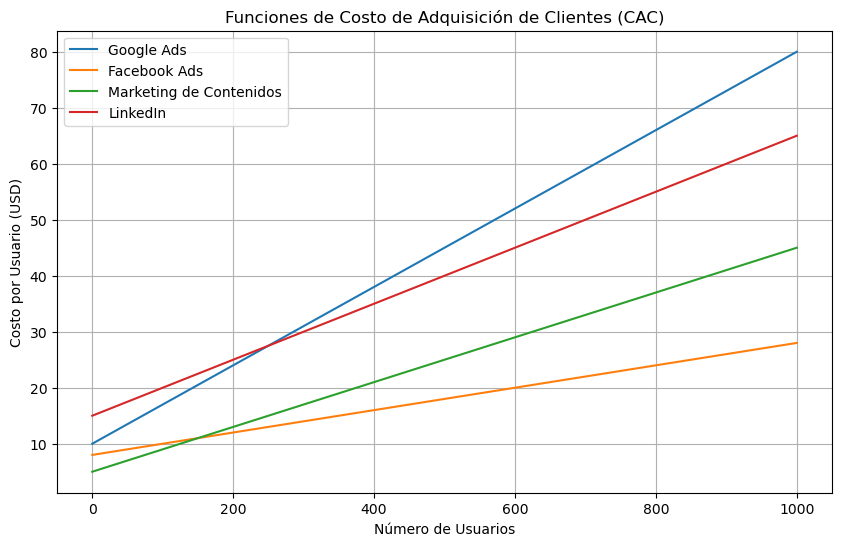

In [6]:
# Definir el rango de usuarios
users_range = np.linspace(0, 1000, 100)

# Calcular los costos para cada función de CAC
google_ads_costs = [cac_google_ads(users) for users in users_range]
facebook_ads_costs = [cac_facebook_ads(users) for users in users_range]
content_marketing_costs = [cac_content_marketing(users) for users in users_range]
linkedin_costs = [cac_linkedin(users) for users in users_range]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(users_range, google_ads_costs, label='Google Ads')
plt.plot(users_range, facebook_ads_costs, label='Facebook Ads')
plt.plot(users_range, content_marketing_costs, label='Marketing de Contenidos')
plt.plot(users_range, linkedin_costs, label='LinkedIn')
plt.xlabel('Número de Usuarios')
plt.ylabel('Costo por Usuario (USD)')
plt.title('Funciones de Costo de Adquisición de Clientes (CAC)')
plt.legend()
plt.grid(True)
plt.show()

La función del cac tiene 2 coeficientes, el del intercepto y el que multiplica a la cantidad de usuarios. Si el valor del coeficiente que multiplica a la cantidad de usuarios es mayor, el cac de este canal de marketing incrementa más rápido.

### Simulación 2

In [7]:
# Ejemplo de funciones de CAC (en USD) en función del número de usuarios adquiridos
def cac_google_ads(users):
    return 10 + 0.02 * users  # Incremental cost per user

def cac_facebook_ads(users):
    return 8 + 0.03 * users

def cac_content_marketing(users):
    return 5 + 0.01 * users

def cac_linkedin(users):
    return 15 + 0.04 * users

In [8]:
# Presupuesto total en USD
budget = 10000

# Función de usuarios totales a maximizar
def total_users(x):
    google_users, fb_users, content_users, linkedin_users = x
    return -1 * (google_users + fb_users + content_users + linkedin_users)  # Negativo para maximizar con minimize

# Función de costo total, sujeto a la restricción del presupuesto
def total_cost(x):
    google_users, fb_users, content_users, linkedin_users = x
    return (google_users * cac_google_ads(google_users) +
            fb_users * cac_facebook_ads(fb_users) +
            content_users * cac_content_marketing(content_users) +
            linkedin_users * cac_linkedin(linkedin_users))

# Restricciones
constraints = [
    {'type': 'ineq', 'fun': lambda x: budget - total_cost(x)}  # Restricción de presupuesto
]

# Límite inferior para cada variable (no se pueden adquirir usuarios negativos)
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Suposición inicial
initial_guess = [100, 100, 100, 100]

# Resolver el problema de optimización
result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

# Mostrar resultados
print("Usuarios adquiridos por canal:")
print(f"Google Ads: {int(result.x[0])}")
print(f"Facebook Ads: {int(result.x[1])}")
print(f"Marketing de Contenidos: {int(result.x[2])}")
print(f"LinkedIn: {int(result.x[3])}")
print(f"Costo total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")

Usuarios adquiridos por canal:
Google Ads: 157
Facebook Ads: 138
Marketing de Contenidos: 564
LinkedIn: 16
Costo total estimado: $10,000.00
Usuarios totales adquiridos: 875


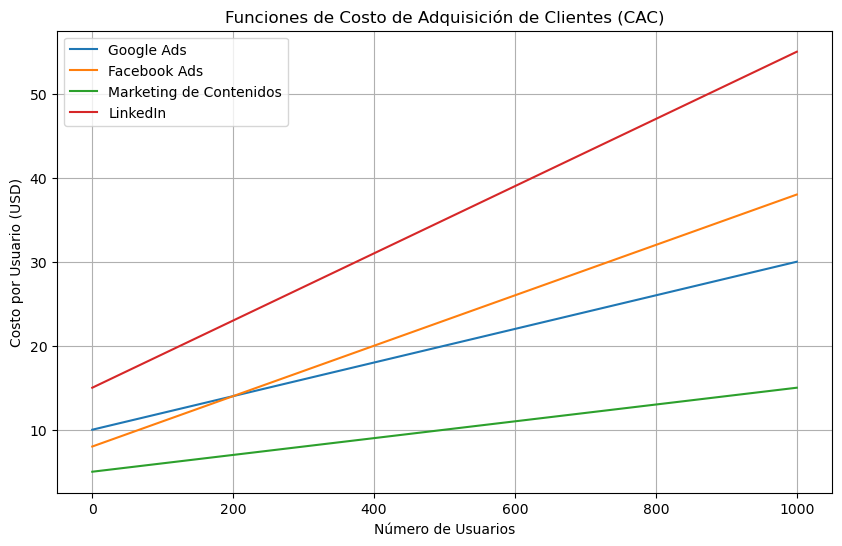

In [9]:
# Definir el rango de usuarios
users_range = np.linspace(0, 1000, 100)

# Calcular los costos para cada función de CAC
google_ads_costs = [cac_google_ads(users) for users in users_range]
facebook_ads_costs = [cac_facebook_ads(users) for users in users_range]
content_marketing_costs = [cac_content_marketing(users) for users in users_range]
linkedin_costs = [cac_linkedin(users) for users in users_range]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(users_range, google_ads_costs, label='Google Ads')
plt.plot(users_range, facebook_ads_costs, label='Facebook Ads')
plt.plot(users_range, content_marketing_costs, label='Marketing de Contenidos')
plt.plot(users_range, linkedin_costs, label='LinkedIn')
plt.xlabel('Número de Usuarios')
plt.ylabel('Costo por Usuario (USD)')
plt.title('Funciones de Costo de Adquisición de Clientes (CAC)')
plt.legend()
plt.grid(True)
plt.show()

Si los coeficientes que multiplican a la cantidad de usuarios son menores, el cac crece más lento, por lo tanto con el mismo presupuesto se pueden adquirir una mayor cantidad de usuarios.

### Conclusiones

Cambiar los coeficientes tiene un efecto en el resultado, pues el total de clientes adquiridos es distinto en cada simulación y en compración con el caso original. Las gráficas nos permiten ver como se comporta el cac segín la cantidad de clientes que se va adquiriendo. Uno de los puntos más importantes es el valor del coeficiente que multiplica a la cantidad de usuarios, pues es el que tiene un efecto en la tasa de crecimiento del cac; este valor si es mayor hace que el cac crezca muy rápido y al contrario, si es un número pequeño el cac crece de forma más lenta.


## Cambiando el presupuesto

### Simulación 1

In [10]:
# Ejemplo de funciones de CAC (en USD) en función del número de usuarios adquiridos
def cac_google_ads(users):
    return 10 + 0.05 * users  # Incremental cost per user

def cac_facebook_ads(users):
    return 8 + 0.03 * users

def cac_content_marketing(users):
    return 5 + 0.02 * users

def cac_linkedin(users):
    return 15 + 0.07 * users

In [11]:
# Presupuesto total en USD
budget = 20000

# Función de usuarios totales a maximizar
def total_users(x):
    google_users, fb_users, content_users, linkedin_users = x
    return -1 * (google_users + fb_users + content_users + linkedin_users)  # Negativo para maximizar con minimize

# Función de costo total, sujeto a la restricción del presupuesto
def total_cost(x):
    google_users, fb_users, content_users, linkedin_users = x
    return (google_users * cac_google_ads(google_users) +
            fb_users * cac_facebook_ads(fb_users) +
            content_users * cac_content_marketing(content_users) +
            linkedin_users * cac_linkedin(linkedin_users))

# Restricciones
constraints = [
    {'type': 'ineq', 'fun': lambda x: budget - total_cost(x)}  # Restricción de presupuesto
]

# Límite inferior para cada variable (no se pueden adquirir usuarios negativos)
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Suposición inicial
initial_guess = [100, 100, 100, 100]

# Resolver el problema de optimización
result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

# Mostrar resultados
print("Usuarios adquiridos por canal:")
print(f"Google Ads: {int(result.x[0])}")
print(f"Facebook Ads: {int(result.x[1])}")
print(f"Marketing de Contenidos: {int(result.x[2])}")
print(f"LinkedIn: {int(result.x[3])}")
print(f"Costo total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")

Usuarios adquiridos por canal:
Google Ads: 174
Facebook Ads: 324
Marketing de Contenidos: 561
LinkedIn: 88
Costo total estimado: $20,000.00
Usuarios totales adquiridos: 1148


In [12]:
# Para este ejemplo se dedico un presupuesto de 20000 USD, el cual se distribuyo de la siguiente manera:

print("Google:",int(result.x[0]) * cac_google_ads(int(result.x[0])))
print("Facebook:",int(result.x[1]) * cac_facebook_ads(int(result.x[1])))
print("Marketing de contenidos:",int(result.x[2]) * cac_content_marketing(int(result.x[2])))
print("LinkedIn:",int(result.x[3]) * cac_linkedin(int(result.x[3])))

Google: 3253.8000000000006
Facebook: 5741.28
Marketing de contenidos: 9099.42
LinkedIn: 1862.08


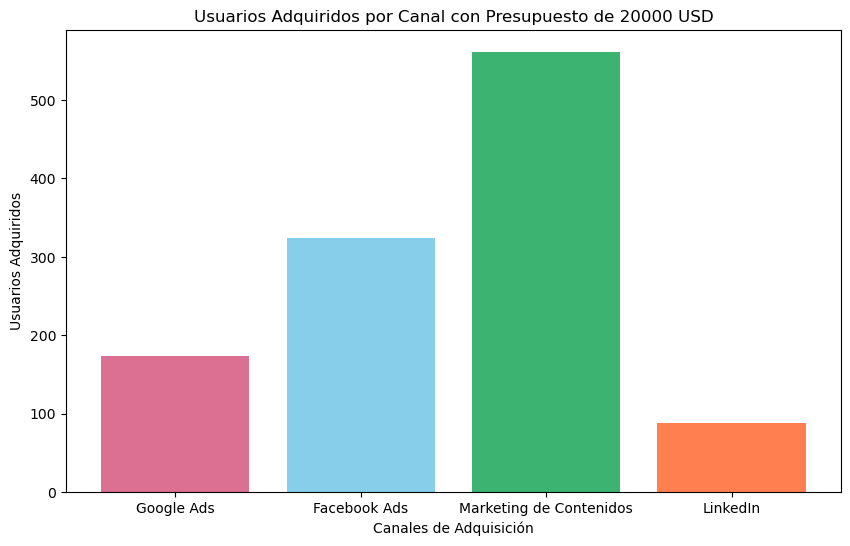

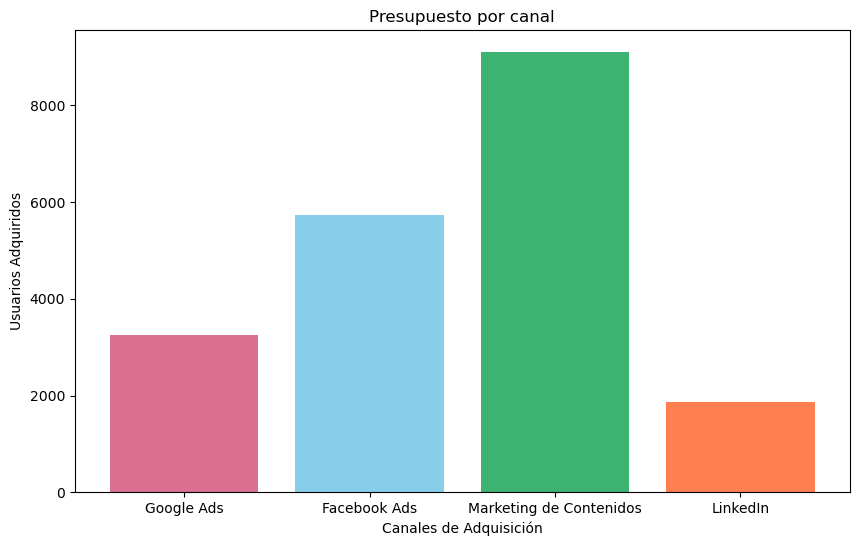

In [13]:
# Datos de usuarios adquiridos por canal
channels = ['Google Ads', 'Facebook Ads', 'Marketing de Contenidos', 'LinkedIn']
users_acquired = [174, 324, 561, 88]
cost = [3253.80, 5741.28, 9099.42, 1862.08]

# Crear el barplot
plt.figure(figsize=(10, 6))
plt.bar(channels, users_acquired, color=['palevioletred', 'skyblue', 'mediumseagreen', 'coral'])
plt.xlabel('Canales de Adquisición')
plt.ylabel('Usuarios Adquiridos')
plt.title('Usuarios Adquiridos por Canal con Presupuesto de 20000 USD')
plt.show()

# Crear el barplot
plt.figure(figsize=(10, 6))
plt.bar(channels, cost, color=['palevioletred', 'skyblue', 'mediumseagreen', 'coral'])
plt.xlabel('Canales de Adquisición')
plt.ylabel('Usuarios Adquiridos')
plt.title('Presupuesto por canal')
plt.show()

Subimos el presupuesto de 10,000 a 20,000, en los resultados podemos observar que el número de usuarios adquiridos aumentó, sin embargo, no es proporcional el incremento, pues el número de usuarios por canal a comparación del caso original no es el doble.

### Simulación 2

In [14]:
# Ejemplo de funciones de CAC (en USD) en función del número de usuarios adquiridos
def cac_google_ads(users):
    return 10 + 0.05 * users  # Incremental cost per user

def cac_facebook_ads(users):
    return 8 + 0.03 * users

def cac_content_marketing(users):
    return 5 + 0.02 * users

def cac_linkedin(users):
    return 15 + 0.07 * users

In [15]:
# Presupuesto total en USD
budget = 5000

# Función de usuarios totales a maximizar
def total_users(x):
    google_users, fb_users, content_users, linkedin_users = x
    return -1 * (google_users + fb_users + content_users + linkedin_users)  # Negativo para maximizar con minimize

# Función de costo total, sujeto a la restricción del presupuesto
def total_cost(x):
    google_users, fb_users, content_users, linkedin_users = x
    return (google_users * cac_google_ads(google_users) +
            fb_users * cac_facebook_ads(fb_users) +
            content_users * cac_content_marketing(content_users) +
            linkedin_users * cac_linkedin(linkedin_users))

# Restricciones
constraints = [
    {'type': 'ineq', 'fun': lambda x: budget - total_cost(x)}  # Restricción de presupuesto
]

# Límite inferior para cada variable (no se pueden adquirir usuarios negativos)
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Suposición inicial
initial_guess = [100, 100, 100, 100]

# Resolver el problema de optimización
result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

# Mostrar resultados
print("Usuarios adquiridos por canal:")
print(f"Google Ads: {int(result.x[0])}")
print(f"Facebook Ads: {int(result.x[1])}")
print(f"Marketing de Contenidos: {int(result.x[2])}")
print(f"LinkedIn: {int(result.x[3])}")
print(f"Costo total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")

Usuarios adquiridos por canal:
Google Ads: 55
Facebook Ads: 126
Marketing de Contenidos: 264
LinkedIn: 4
Costo total estimado: $5,000.00
Usuarios totales adquiridos: 451


In [16]:
# Para este ejemplo se dedico un presupuesto de 5000 USD, el cual se distribuyo de la siguiente manera:

print("Google:",int(result.x[0]) * cac_google_ads(int(result.x[0])))
print("Facebook:",int(result.x[1]) * cac_facebook_ads(int(result.x[1])))
print("Marketing de contenidos:",int(result.x[2]) * cac_content_marketing(int(result.x[2])))
print("LinkedIn:",int(result.x[3]) * cac_linkedin(int(result.x[3])))

Google: 701.25
Facebook: 1484.28
Marketing de contenidos: 2713.92
LinkedIn: 61.12


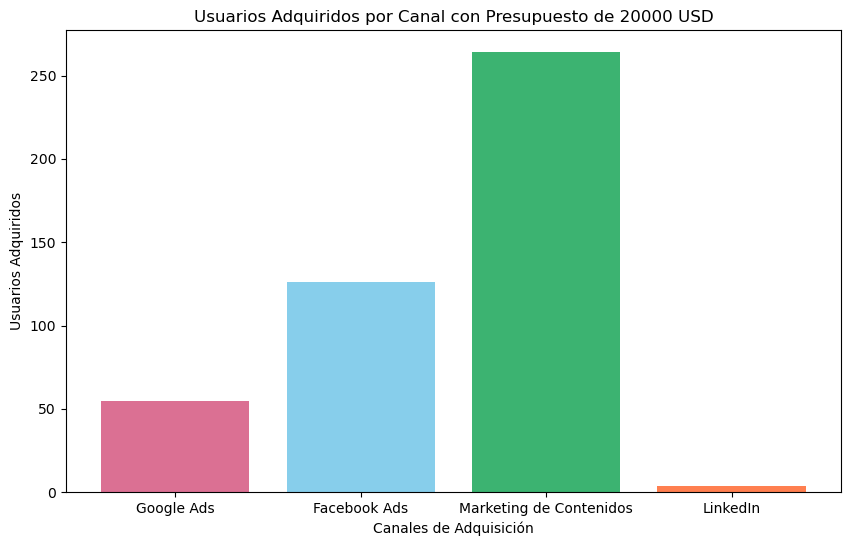

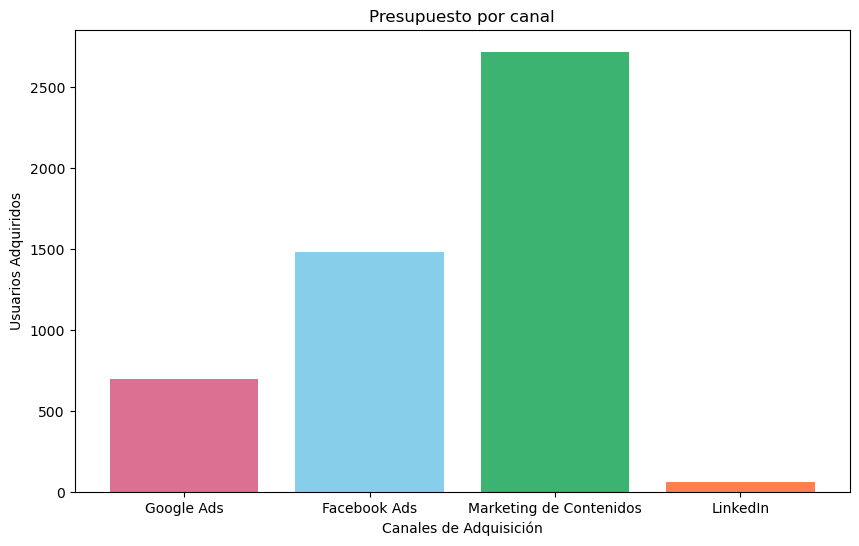

In [17]:
# Datos de usuarios adquiridos por canal
channels = ['Google Ads', 'Facebook Ads', 'Marketing de Contenidos', 'LinkedIn']
users_acquired = [55, 126, 264, 4]
cost = [701.25, 1484.28, 2713.92, 61.12]

# Crear el barplot
plt.figure(figsize=(10, 6))
plt.bar(channels, users_acquired, color=['palevioletred', 'skyblue', 'mediumseagreen', 'coral'])
plt.xlabel('Canales de Adquisición')
plt.ylabel('Usuarios Adquiridos')
plt.title('Usuarios Adquiridos por Canal con Presupuesto de 20000 USD')
plt.show()

# Crear el barplot
plt.figure(figsize=(10, 6))
plt.bar(channels, cost, color=['palevioletred', 'skyblue', 'mediumseagreen', 'coral'])
plt.xlabel('Canales de Adquisición')
plt.ylabel('Usuarios Adquiridos')
plt.title('Presupuesto por canal')
plt.show()

Al reducir el presupuesto a la mitad, la cantidad de usuarios se redujo, igualmente de manera no proporcional, pues la reducción no fue la mitad.

### Simulación 3

In [18]:
# Ejemplo de funciones de CAC (en USD) en función del número de usuarios adquiridos
def cac_google_ads(users):
    return 10 + 0.03 * users  # Incremental cost per user

def cac_facebook_ads(users):
    return 8 + 0.02 * users

def cac_content_marketing(users):
    return 5 + 0.03 * users

def cac_linkedin(users):
    return 15 + 0.02 * users

In [19]:
# Presupuesto total en USD
budget = 15000

# Función de usuarios totales a maximizar
def total_users(x):
    google_users, fb_users, content_users, linkedin_users = x
    return -1 * (google_users + fb_users + content_users + linkedin_users)  # Negativo para maximizar con minimize

# Función de costo total, sujeto a la restricción del presupuesto
def total_cost(x):
    google_users, fb_users, content_users, linkedin_users = x
    return (google_users * cac_google_ads(google_users) +
            fb_users * cac_facebook_ads(fb_users) +
            content_users * cac_content_marketing(content_users) +
            linkedin_users * cac_linkedin(linkedin_users))

# Restricciones
constraints = [
    {'type': 'ineq', 'fun': lambda x: budget - total_cost(x)}  # Restricción de presupuesto
]

# Límite inferior para cada variable (no se pueden adquirir usuarios negativos)
bounds = [(0, None), (0, None), (0, None), (0, None)]

# Suposición inicial
initial_guess = [100, 100, 100, 100]

# Resolver el problema de optimización
result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

# Mostrar resultados
print("Usuarios adquiridos por canal:")
print(f"Google Ads: {int(result.x[0])}")
print(f"Facebook Ads: {int(result.x[1])}")
print(f"Marketing de Contenidos: {int(result.x[2])}")
print(f"LinkedIn: {int(result.x[3])}")
print(f"Costo total estimado: ${total_cost(result.x):,.2f}")
print(f"Usuarios totales adquiridos: {int(-result.fun)}")

Usuarios adquiridos por canal:
Google Ads: 195
Facebook Ads: 342
Marketing de Contenidos: 278
LinkedIn: 167
Costo total estimado: $15,000.00
Usuarios totales adquiridos: 984


In [20]:
# Para este ejemplo se dedico un presupuesto de 15000 USD, el cual se distribuyo de la siguiente manera:

print("Google:",int(result.x[0]) * cac_google_ads(int(result.x[0])))
print("Facebook:",int(result.x[1]) * cac_facebook_ads(int(result.x[1])))
print("Marketing de contenidos:",int(result.x[2]) * cac_content_marketing(int(result.x[2])))
print("LinkedIn:",int(result.x[3]) * cac_linkedin(int(result.x[3])))

Google: 3090.75
Facebook: 5075.28
Marketing de contenidos: 3708.52
LinkedIn: 3062.78


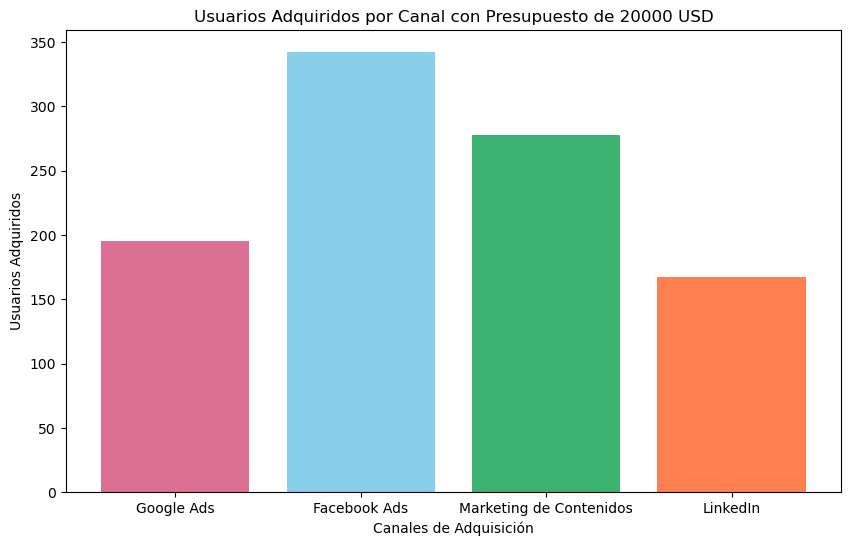

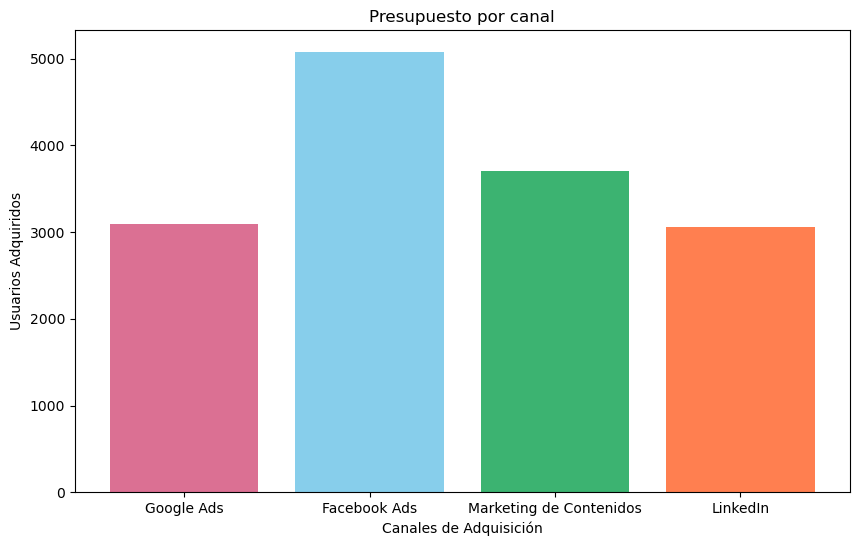

In [21]:
# Datos de usuarios adquiridos por canal
channels = ['Google Ads', 'Facebook Ads', 'Marketing de Contenidos', 'LinkedIn']
users_acquired = [195, 342, 278, 167]
cost = [3090.75, 5075.28, 3708.52, 3062.78]

# Crear el barplot
plt.figure(figsize=(10, 6))
plt.bar(channels, users_acquired, color=['palevioletred', 'skyblue', 'mediumseagreen', 'coral'])
plt.xlabel('Canales de Adquisición')
plt.ylabel('Usuarios Adquiridos')
plt.title('Usuarios Adquiridos por Canal con Presupuesto de 20000 USD')
plt.show()

# Crear el barplot
plt.figure(figsize=(10, 6))
plt.bar(channels, cost, color=['palevioletred', 'skyblue', 'mediumseagreen', 'coral'])
plt.xlabel('Canales de Adquisición')
plt.ylabel('Usuarios Adquiridos')
plt.title('Presupuesto por canal')
plt.show()

Para este caso movimos tanto coeficientes como el presupuesto, obteniendo resultados diferentes y de igual forma no fueron proporcionales al caso original.

### Conclusiones generales

El cambio en el presupuesto si afecta de forma directa a la cantidad de usuarios adquiridos, mayor presupuesto permite adquirir más usuarios, y viceversa. Cabe reslatar que el cambio en la cantidad de clientes adquiridos no es proporcional al cambio en el presupuesto, esto se debe al tipo de función que representa el costo de adquisición, la cual no es una función lineal, esto hace imposible que el cambio en clientes adquiridos sea proporcional al cambio en el presupuesto. 

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Luis Márquez, Ana Sofía Hinojosa, and Ivanna Herrera
</footer>